In [340]:
#importing labraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from PIL import Image
import os
import csv
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l1, l2
import random
from sklearn.metrics import confusion_matrix

* Resize Images: All images are resized to a uniform size suitable for the model.

* Common sizes are 224x224, 256x256, or 512x512 pixels

In [341]:
# Path to the directory containing images
images_directory = 'D:\\Data Science\\Projects\\Image processing\\ML task\\ML task dataset'

# Target size for resizing
target_height, target_width = 512, 512

# Create a new directory to store resized images
output_directory = 'resized_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate through each image in the directory
for image_file in os.listdir(images_directory):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        # Load the image
        image_path = os.path.join(images_directory, image_file)
        image = Image.open(image_path)

        # Resize the image
        resized_image = image.resize((target_width, target_height))

        # Save the resized image to the output directory
        output_path = os.path.join(output_directory, image_file)
        resized_image.save(output_path)

        print(f'{image_file} has been resized and saved to {output_path}')

car1.jpg has been resized and saved to resized_images\car1.jpg
car10.jpg has been resized and saved to resized_images\car10.jpg
car13.jpg has been resized and saved to resized_images\car13.jpg
car14.jpg has been resized and saved to resized_images\car14.jpg
car2.jpg has been resized and saved to resized_images\car2.jpg
car3.jpg has been resized and saved to resized_images\car3.jpg
car4.jpg has been resized and saved to resized_images\car4.jpg
car6.jpg has been resized and saved to resized_images\car6.jpg
car7.jpg has been resized and saved to resized_images\car7.jpg
car8.jpg has been resized and saved to resized_images\car8.jpg
car9.jpg has been resized and saved to resized_images\car9.jpg


* Color Space: Convert images to an appropriate color space (RGB).

In [342]:
# Path to the directory containing images
images_directory = 'D:\\Data Science\\Projects\\Image processing\\ML task\\resized_images'

# Create a new directory to store RGB images
output_directory = 'rgb_images'
os.makedirs(output_directory, exist_ok=True)

# Iterate through each image in the directory
for image_file in os.listdir(images_directory):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        # Load the image
        image_path = os.path.join(images_directory, image_file)
        image = Image.open(image_path)

        # Convert the image to RGB color space
        rgb_image = image.convert('RGB')

        # Save the RGB image to the output directory
        output_path = os.path.join(output_directory, image_file)
        rgb_image.save(output_path)

        print(f'{image_file} has been converted to RGB and saved to {output_path}')

car1.jpg has been converted to RGB and saved to rgb_images\car1.jpg
car10.jpg has been converted to RGB and saved to rgb_images\car10.jpg
car12.jpg has been converted to RGB and saved to rgb_images\car12.jpg
car13.jpg has been converted to RGB and saved to rgb_images\car13.jpg
car14.jpg has been converted to RGB and saved to rgb_images\car14.jpg
car2.jpg has been converted to RGB and saved to rgb_images\car2.jpg
car3.jpg has been converted to RGB and saved to rgb_images\car3.jpg
car4.jpg has been converted to RGB and saved to rgb_images\car4.jpg
car6.jpg has been converted to RGB and saved to rgb_images\car6.jpg
car7.jpg has been converted to RGB and saved to rgb_images\car7.jpg
car8.jpg has been converted to RGB and saved to rgb_images\car8.jpg
car9.jpg has been converted to RGB and saved to rgb_images\car9.jpg


* Combining all xml files into csv format

In [343]:
# Directory containing the XML files
xml_directory = "D:\\Data Science\\Projects\\Image processing\\ML task\\annotation_image"

# Initialize a list to store the combined data
combined_data = []

# Iterate through the XML files
for filename in os.listdir(xml_directory):
    if filename.endswith(".xml"):
        xml_path = os.path.join(xml_directory, filename)

        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Extract relevant information for each car
        for car in root.findall(".//object"):
            image_filename = root.find("filename").text
            xmin = int(car.find("bndbox/xmin").text)
            ymin = int(car.find("bndbox/ymin").text)
            xmax = int(car.find("bndbox/xmax").text)
            ymax = int(car.find("bndbox/ymax").text)
            orientation_direction = car.find("orientation_direction").text

            # Append the data to the combined_data list
            combined_data.append({
                "image_filename": image_filename,
                "xmin": xmin,
                "ymin": ymin,
                "xmax": xmax,
                "ymax": ymax,
                "orientation_direction": orientation_direction
            })

# Specify the CSV file path
csv_file_path = "combined_annotations1.csv"

# Field names (headers)
field_names = ["image_filename", "xmin", "ymin", "xmax", "ymax", "orientation_direction"]

# Write to CSV
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=field_names)
    
    # Write header
    writer.writeheader()
    
    # Write data rows
    for entry in combined_data:
        writer.writerow(entry)

print("Combined CSV file saved successfully.")


Combined CSV file saved successfully.


In [344]:
# loading created dataset(.csv file)
df=pd.read_csv('combined_annotations1.csv')
df.head()

,image_filename,xmin,ymin,xmax,ymax,orientation_direction
0,car1.jpg,165,121,221,146,northeast
1,car1.jpg,247,113,312,143,west
2,car1.jpg,350,127,422,170,northwest
3,car1.jpg,78,155,166,205,southeast
4,car1.jpg,185,157,269,229,southeast


In [345]:
df.columns

Index(['image_filename', 'xmin', 'ymin', 'xmax', 'ymax',
       'orientation_direction'],
      dtype='object')

In [346]:
# dropping unwanted column
df = df.drop('image_filename', axis=1)

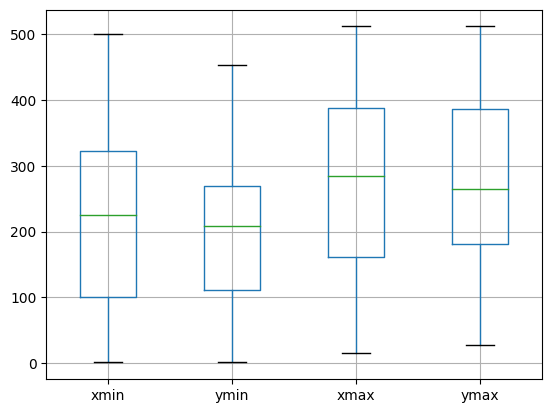

In [347]:
# Outlier detection
df.boxplot()
plt.show()

In [348]:
# Label encoding for target column
encoder=LabelEncoder()
df['orientation_direction']=encoder.fit_transform(df['orientation_direction'])
df

,xmin,ymin,xmax,ymax,orientation_direction
0,165,121,221,146,3
1,247,113,312,143,8
2,350,127,422,170,4
3,78,155,166,205,6
4,185,157,269,229,6
...,...,...,...,...,...
198,192,1,275,53,7
199,261,1,373,139,7
200,326,66,449,228,7
201,392,154,512,311,7


In [349]:
# Checking Imbalanced target column
df['orientation_direction'].value_counts()

6    60
7    46
3    33
8    16
5    15
0    13
1    10
4     7
2     3
Name: orientation_direction, dtype: int64

In [350]:
#applying minmax scaler for machine not to biased for big value
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(df.drop('orientation_direction',axis=1))
df1

array([[0.32865731, 0.26548673, 0.41448692, 0.24536082],
       [0.49298597, 0.24778761, 0.59758551, 0.23917526],
       [0.6993988 , 0.27876106, 0.81891348, 0.29484536],
       [0.15430862, 0.34070796, 0.30382294, 0.36701031],
       [0.36873747, 0.34513274, 0.5110664 , 0.41649485],
       [0.53907816, 0.31637168, 0.66599598, 0.35257732],
       [0.09418838, 0.46681416, 0.26559356, 0.62886598],
       [0.30661323, 0.54424779, 0.58350101, 0.78762887],
       [0.66733467, 0.40486726, 0.86317907, 0.56907216],
       [0.00200401, 0.12610619, 0.16901408, 0.70103093],
       [0.19038076, 0.1880531 , 0.3722334 , 0.73402062],
       [0.5991984 , 0.15265487, 0.77867203, 0.71958763],
       [0.79759519, 0.19690265, 0.98189135, 0.71958763],
       [0.03206413, 0.20353982, 0.20321932, 0.27628866],
       [0.16833667, 0.25884956, 0.28169014, 0.31958763],
       [0.29659319, 0.30309735, 0.38832998, 0.36701031],
       [0.3987976 , 0.31858407, 0.48692153, 0.40618557],
       [0.51102204, 0.34513274,

In [351]:
# Convert the NumPy array to a DataFrame
df_scale = pd.DataFrame(df1, columns=['xmin', 'ymin', 'xmax','ymax'])
df_scale

,xmin,ymin,xmax,ymax
0,0.328657,0.265487,0.414487,0.245361
1,0.492986,0.247788,0.597586,0.239175
2,0.699399,0.278761,0.818913,0.294845
3,0.154309,0.340708,0.303823,0.367010
4,0.368737,0.345133,0.511066,0.416495
...,...,...,...,...
198,0.382766,0.000000,0.523139,0.053608
199,0.521042,0.000000,0.720322,0.230928
200,0.651303,0.143805,0.873239,0.414433
201,0.783567,0.338496,1.000000,0.585567


In this module we create the independent and dependent feature, then split them into train and test data. Later we collect all the numerical features

In [352]:
# Features
X=df_scale.copy()
X

,xmin,ymin,xmax,ymax
0,0.328657,0.265487,0.414487,0.245361
1,0.492986,0.247788,0.597586,0.239175
2,0.699399,0.278761,0.818913,0.294845
3,0.154309,0.340708,0.303823,0.367010
4,0.368737,0.345133,0.511066,0.416495
...,...,...,...,...
198,0.382766,0.000000,0.523139,0.053608
199,0.521042,0.000000,0.720322,0.230928
200,0.651303,0.143805,0.873239,0.414433
201,0.783567,0.338496,1.000000,0.585567


In [353]:
# target
y=df['orientation_direction']
y

0      3
1      8
2      4
3      6
4      6
      ..
198    7
199    7
200    7
201    7
202    7
Name: orientation_direction, Length: 203, dtype: int32

In [354]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

* Since the data is imbalanced, So We will use oversamping technique

* We will use RandomOverSampler (ROS) for sampling the the data to balance our data

In [355]:
ros = RandomOverSampler(random_state = 30)
#Fitting the data using ROS
x_resample, y_resample = ros.fit_resample(X_train, y_train)
y_resample = pd.DataFrame(y_resample)
y_resample.value_counts()

orientation_direction
0                        50
1                        50
2                        50
3                        50
4                        50
5                        50
6                        50
7                        50
8                        50
dtype: int64

In [356]:
# Now target column has balanced class values

In [357]:
y_resample.shape

(450, 1)

In [358]:
x_resample.shape

(450, 4)

In [359]:
X_test.shape

(41, 4)

# Modelling

In [360]:
# Define the input shape for numerical data 
input_shape = (4,)
# Number of classes for car orientation
num_classes = len(y_resample['orientation_direction'].unique())
# Convert target labels to one-hot encoding
y_resample_encoded = to_categorical(y_resample, num_classes=num_classes)
# Create a classification model
model_input = Input(shape=input_shape)
x = Dense(128, activation='relu')(model_input)
x = Dense(64, activation='relu')(x)
orientation_output = Dense(num_classes, activation='softmax', name='output_orientation')(x)
# Create the final model
model1 = Model(inputs=model_input, outputs=orientation_output)
# Compile the model with an appropriate optimizer and loss function
model1.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# Display the model summary
model1.summary()

# Train the model
model1.fit(x_resample, y_resample_encoded, epochs=10, batch_size=32)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=num_classes))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

Model: "model_155"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_166 (InputLayer)      [(None, 4)]               0         
                                                                 
 dense_307 (Dense)           (None, 128)               640       
                                                                 
 dense_308 (Dense)           (None, 64)                8256      
                                                                 
 output_orientation (Dense)  (None, 9)                 585       
                                                                 
Total params: 9,481
Trainable params: 9,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 2.1633 - accuracy: 0.1222
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 2.0141 - accuracy

In [361]:
# Accuracy is too low..Lets increase this model accuracy usingHyper-parameter Tunning

## Hyper-Parameter Tunning
               - with various regularization values
               - Activation fuction = tanh
               - epochs= 100

In [362]:
# Set random seeds for reproducibility
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

# Define the input shape for your numerical data
input_shape = (4,)
# Number of classes for car orientation
num_classes = len(y_resample['orientation_direction'].unique())
# Define a list of regularization strengths to try
regularization_strengths = [0.05, 0.001, 0.0001,0.02]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_accuracy = 0.0

for reg_strength in regularization_strengths:
    # Convert target labels to one-hot encoding
    y_resample_encoded = to_categorical(y_resample, num_classes=num_classes)
    # Create a classification model with L2 regularization
    model_input = Input(shape=input_shape)
    x = Dense(128, activation='tanh', kernel_regularizer=l2(reg_strength))(model_input)
    x = Dense(64, activation='tanh', kernel_regularizer=l2(reg_strength))(x)
    orientation_output = Dense(num_classes, activation='softmax', name='output_orientation')(x)
    # Create the final model
    model = Model(inputs=model_input, outputs=orientation_output)
    # Compile the model with an appropriate optimizer and loss function
    model.compile(optimizer=Adam(learning_rate=0.02), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(x_resample, y_resample_encoded, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch_size as needed
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=num_classes), verbose=0)
    
    # Check if this model has the highest accuracy so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
# Print the best accuracy and corresponding regularization strength
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Regularization Strength: {reg_strength}")


Best Test Accuracy: 65.85%
Best Regularization Strength: 0.02


In [366]:
# Accuracy increase from 12% to 66%

In [363]:
# prediction for test data
y_pred=model.predict(X_test)
y_pred

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 17ms/step


array([[1.43396690e-01, 1.16519704e-01, 3.47942143e-04, 1.10064708e-01,
        2.20230058e-01, 3.23490016e-02, 1.43001437e-01, 1.32317215e-01,
        1.01773210e-01],
       [1.27388895e-01, 1.41717628e-01, 1.17834526e-04, 1.43272281e-01,
        1.72948062e-01, 1.35319933e-01, 1.03642173e-01, 1.13354929e-01,
        6.22382611e-02],
       [1.28553987e-01, 9.53429639e-02, 2.68957671e-02, 1.01628803e-01,
        9.87293273e-02, 1.16873458e-02, 1.56488627e-01, 1.70200944e-01,
        2.10472211e-01],
       [6.55975565e-02, 1.18420407e-01, 1.25507176e-01, 1.65930703e-01,
        1.53723704e-02, 2.43489370e-01, 5.62502667e-02, 1.17754176e-01,
        9.16779786e-02],
       [1.15858831e-01, 1.41125947e-01, 1.37714585e-02, 1.69626594e-01,
        6.18645512e-02, 1.07555516e-01, 1.07263550e-01, 1.57060683e-01,
        1.25872821e-01],
       [1.40153185e-01, 1.07964016e-01, 4.14821366e-03, 1.10294245e-01,
        1.44879341e-01, 1.93262622e-02, 1.55501038e-01, 1.58786044e-01,
        1.5

In [365]:
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([4, 4, 8, 5, 3, 8, 7, 8, 8, 5, 8, 4, 5, 5, 4, 3, 4, 2, 4, 7, 3, 8,
       3, 4, 3, 4, 3, 4, 7, 3, 3, 7, 7, 7, 5, 4, 8, 4, 8, 8, 4],
      dtype=int64)

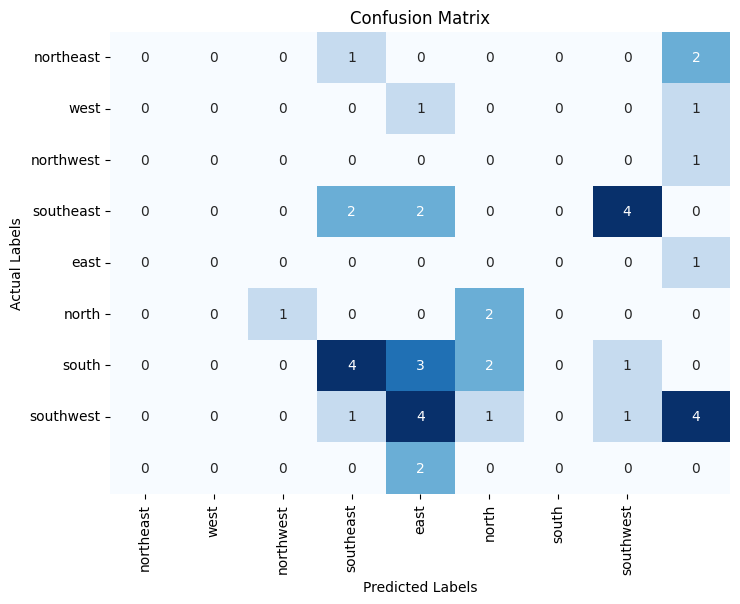

In [364]:
# Confusion Matrics
labels = ["northeast", "west", "northwest", "southeast", "east", "north", "south", "southwest"]

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# It show there are some misclassifiaction too.